In [1]:
! pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from random import choice
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
SEED = 13
np.random.seed(SEED)

# Helper

In [4]:
def generate_n_random_cmap(how_many=20,list_len=10,from_cmap=True,):
    '''
    Generate list of 20 colors 10 times by default. 
    NOTE: Colors can be duplicated if lit_len is greater than length of c_set where c_set is name of all
    of the colormaps from plt.colormap() which can produce more than 20 colors
    '''
    import random
    import matplotlib.pyplot as plt
    
    c_list = []
    cmap_list = ['Accent','Accent_r','Dark2','Dark2_r','Paired','Paired_r','Pastel1','Pastel1_r','Pastel2',
             'Pastel2_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','cividis','cividis_r','icefire',
             'icefire_r','inferno','inferno_r','magma','magma_r','mako','mako_r','plasma','plasma_r',
             'rocket','rocket_r','tab10','tab10_r','tab20','tab20_r','tab20b','tab20b_r','tab20c','tab20c_r',
             'twilight','twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag',
             'vlag_r']
    
    if from_cmap:
        i=0
        while i!=list_len:
            c_list.append(plt.cm.get_cmap(random.choice(cmap_list),how_many).colors)
            i+=1
            
    else:
        for i in range(list_len):
            colors = []
            for j in range(how_many):
                colors.append((random.random(),random.random(),random.random(),1))   
            c_list.append(colors)
            
    return c_list

# Input

In [5]:
with open('project-data/top10.txt') as f:
    words = list(f.readlines())

for i in range(len(words)):
    words[i] = words[i].strip()
    

In [6]:
len(words)

98

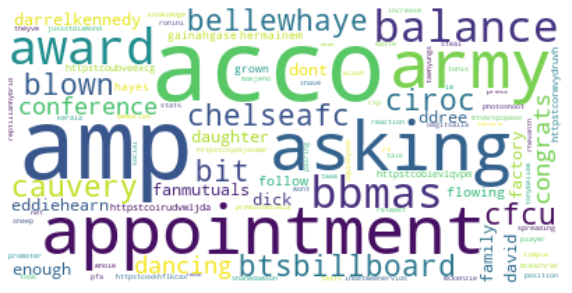

In [7]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(' '.join(words))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
df = pd.read_csv('project-data/train_top10.csv',header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Think
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Upside
2,13,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Explode
3,14,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Think
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shrug


In [10]:
df.drop([0],axis=1,inplace=True)
df.columns = range(len(words)+1)

In [11]:
df.shape

(37143, 99)

In [12]:
df.isna().sum().sum()

0

No Null values are present

In [13]:
X,y = df.drop(98,axis=1),df[98]

_________________________________________________________________________________

In [14]:
X.max().max()

5

Same word has appeared a maximum of 5 times in any tweet

In [15]:
X.max().idxmax()

43

In [16]:
X[44].idxmax()

11021

In [17]:
X.loc[3052,:].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Single word has appeared 5 times and apart from that, no words has appeared at all

In [18]:
df.loc[3052,98]

'Explode'

Explode emoji has been used in this scenario

_______________________________________________________________________________________

In [19]:
X.sum(axis=1).max()

13

There are a maximum number of 13 words that are present in a single tweet

In [20]:
X.sum(axis=1).idxmax()

154

154th item has max number of words

In [21]:
X.loc[154,:].values

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

No term is repeating in the tweet

In [22]:
df.loc[154,98]

'Hands'

Hands Emoji has been used in the case

________________________________________________________________________________________

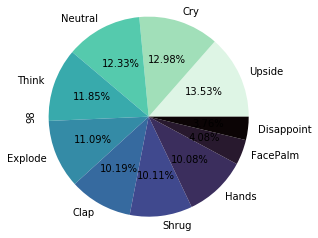

In [23]:
df[98].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.15,colors=generate_n_random_cmap(10,1)[0])

Cry emoji has been used maximum number of times 12.98% of all the data and Disappoint emoji has been used the least number of times 3.76%

____________________________________________________________________________________________

In [24]:
vocab = X.sum()
print(f'Max number counts of a single words is {vocab.max()} which is present at column {vocab.idxmax()}')

Max number counts of a single words is 18711 which is present at column 74


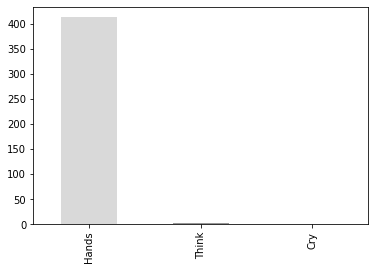

In [25]:
df[df[75]>0][98].value_counts().plot(kind='bar',color=generate_n_random_cmap(10,1)[0])

It looks like that our attribute or word number 75 is directly related to Cry and inversly related to Disppoint as the most number of times it has been used, most number of times there has been a Cry emoji

-------------------------------------------------------------------------------------------------

In [26]:
print(f'Max number counts of a single words is {vocab.min()} which is present at column {vocab.idxmin()}')

Max number counts of a single words is 38 which is present at column 69


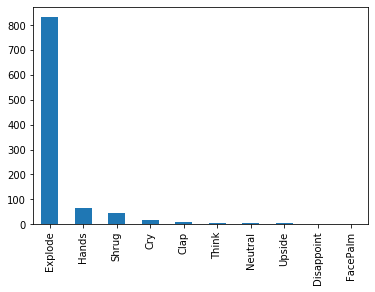

In [27]:
df[df[70]>0][98].value_counts().plot(kind='bar')

This is interesting. Whenever word at column 70 is present in the tweet, Shrug is being used

____________________________________________________________________________________________________

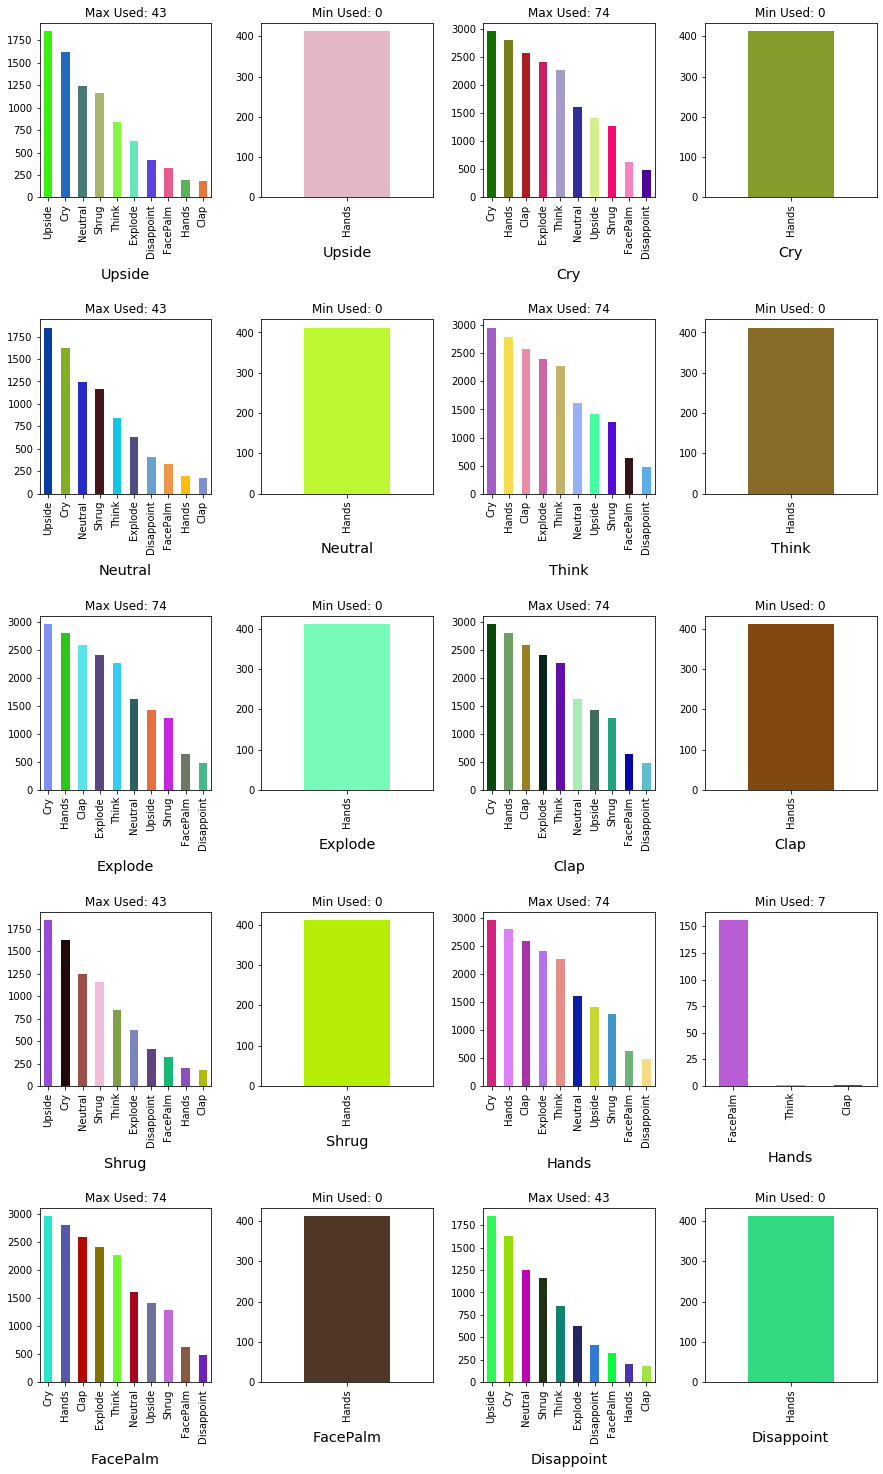

In [28]:
f,ax = plt.subplots(5,4,figsize=(15,25))
ax = ax.ravel()
i=0
color = generate_n_random_cmap(10,20,from_cmap=False)

for name in (df[98].value_counts().index):
    
    max_used = df[df[98]==name].drop(98,axis=1).sum().idxmax()
    min_used = df[df[98]==name].drop(98,axis=1).sum().idxmin()
    
    df[df[max_used]>0][98].value_counts().plot(kind='bar',ax=ax[i],color=color[i],label=words[max_used])
    df[df[min_used]>0][98].value_counts().plot(kind='bar',ax=ax[i+1],color=color[i+1],label=words[min_used])
    
    ax[i].set_xlabel(name,labelpad=10,size='x-large')
    ax[i+1].set_xlabel(name,labelpad=10,size='x-large')
    ax[i].set_title('Max Used: '+ str(max_used))
    ax[i+1].set_title('Min Used: '+ str(min_used))
    # ax[i].legend()
    # ax[i+1].legend()
    
    i+=2

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.29, hspace=0.7)



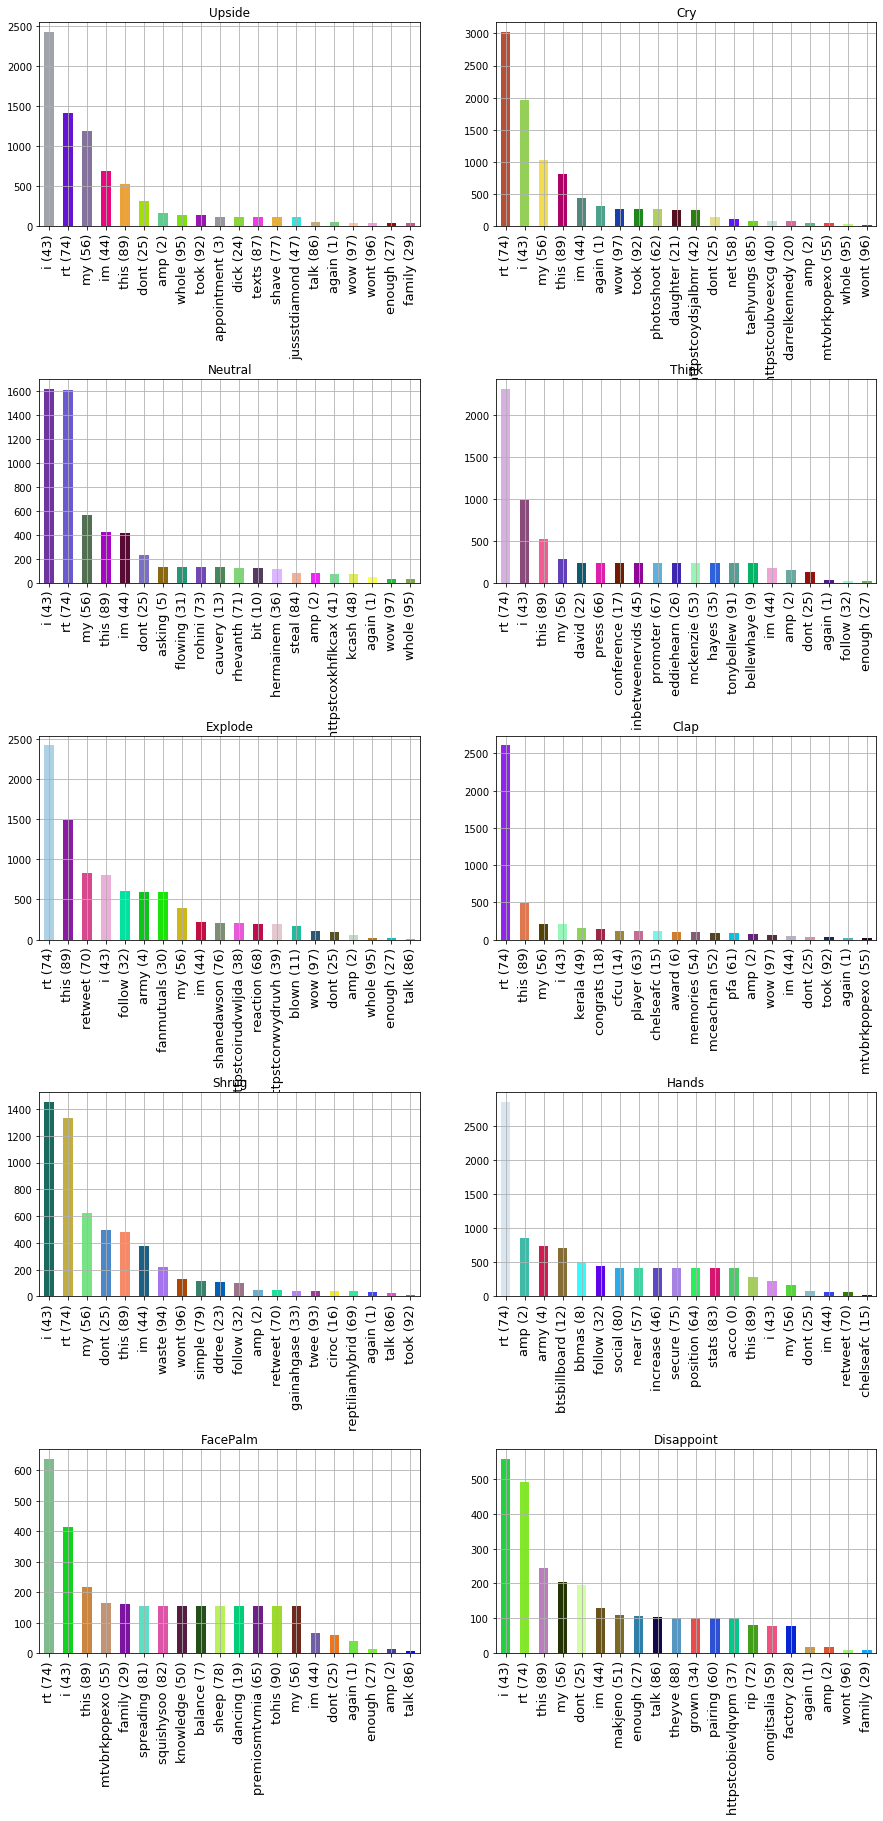

In [29]:
f,ax = plt.subplots(5,2,figsize=(15,30))
ax = ax.ravel()
color = generate_n_random_cmap(from_cmap=False)

for i,name in enumerate(df[98].value_counts().index):
    
    top_20 = df[df[98]==name].drop(98,axis=1).sum().sort_values(ascending=False).head(20)
    top_20.plot(kind='bar',ax=ax[i],color=color[i])
    
    ax[i].set_title(name)
    ax[i].grid()
    
    # Set the words as axis x tick labels
    tick_labels = []
    label_list = ax[i].get_xticklabels() # get already present labels
    for j in range(len(label_list)):
        word_index = int(list(label_list)[j].get_text()) # get int of label text 
        tick_labels.append(words[word_index]+f' ({word_index})')   # append the word present at position
        
    ax[i].set_xticklabels(tick_labels,rotation=90,size=13)

    
#f.suptitle('Top 20 Words')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.75)
plt.show()

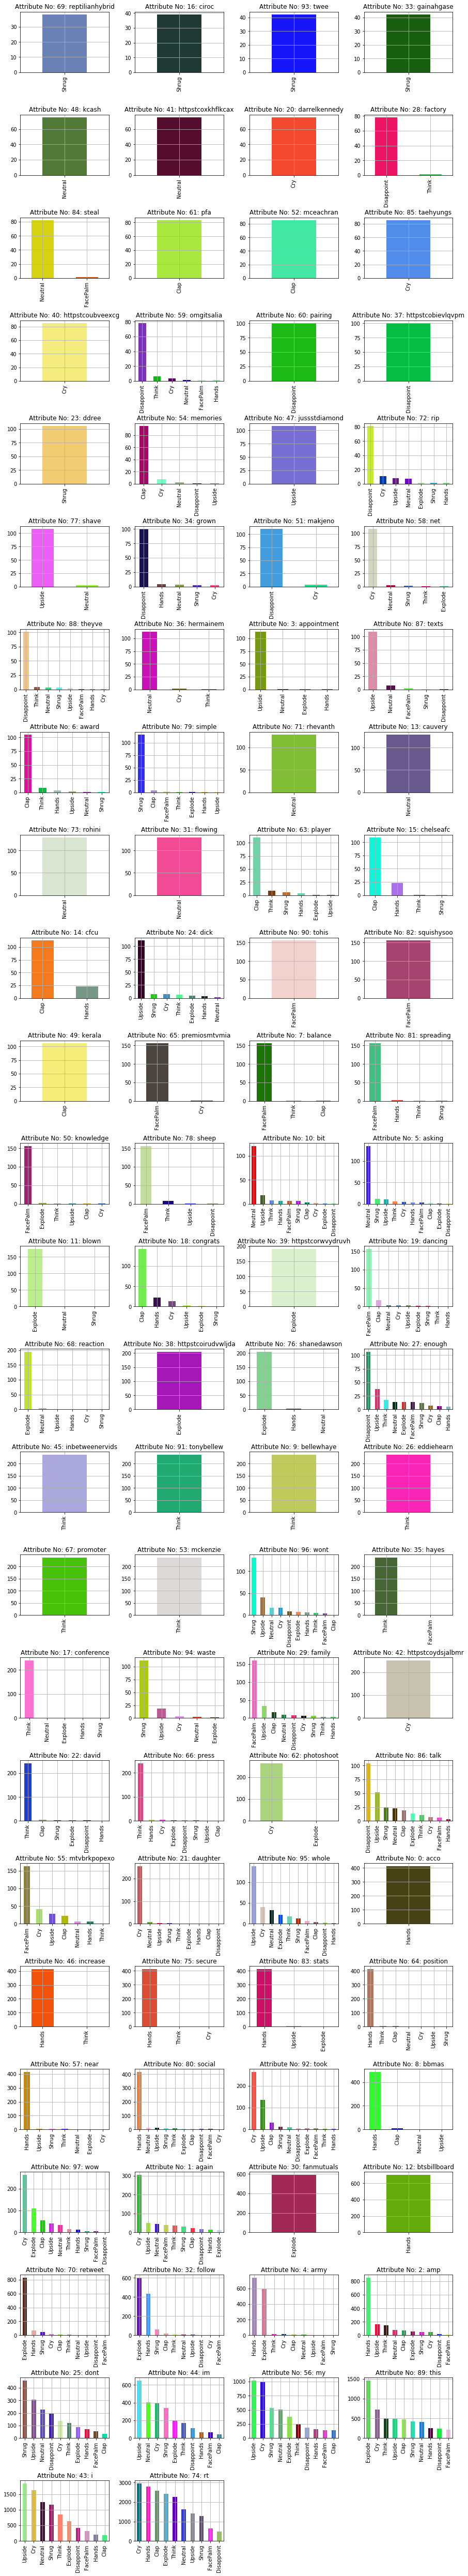

In [30]:
f,ax = plt.subplots(25,4,figsize=(15,90))
ax = ax.ravel()
color = generate_n_random_cmap(10,len(vocab),from_cmap=False)

for i,attribute_index in enumerate(vocab.sort_values().index):
    
    df[df[attribute_index]>0][98].value_counts().plot(kind='bar',ax=ax[i],color=color[i])
    
    ax[i].set_title('Attribute No: '+ str(attribute_index)+ ': '+ words[attribute_index])
    ax[i].grid()

f.delaxes(ax[-1])
f.delaxes(ax[-2])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.29, hspace=0.7)
    
    

In the Figue above, It is quite obvious that it is not the word which has occured `Maximum` number of times but the word which has occured `Minimum` number of times that mostly which affects the result. 
So we can try to drop those maximum frequency words to check our hypothesis if the model improves.

# Model 

In [31]:
X,y = df.drop(98,axis=1).values,df[98].ravel()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=SEED)

In [32]:
def run_models():
    classifiers = [LogisticRegression(random_state=SEED,max_iter=500),
                   SVC(random_state=SEED),
                  GaussianNB(),
                  RandomForestClassifier(random_state=SEED)]

    fitted_clf_lis = []
    for clf in classifiers:
        fitted_clf = clf.fit(X_train,y_train)
        fitted_clf_lis.append(fitted_clf)
        
        y_pred = fitted_clf.predict(X_test)

        acc = accuracy_score(y_test,y_pred)
        prec = precision_score(y_test,y_pred,average='macro')
        rec = recall_score(y_test,y_pred,average='macro')

        print(f'{type(clf).__name__} has:\n')
        print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall:{rec}\n','*'*20)
        
    return(fitted_clf_lis)

In [33]:
base_hypo_models = run_models()

LogisticRegression has:

Accuracy: 0.28796037045014
Precision: 0.5363078336208598
Recall:0.26181558611726113
 ********************
SVC has:

Accuracy: 0.30411371957785915
Precision: 0.5287572148836365
Recall:0.27784524019690615
 ********************
GaussianNB has:

Accuracy: 0.14699547706224425
Precision: 0.6591026642503957
Recall:0.2031948310994632
 ********************
RandomForestClassifier has:

Accuracy: 0.30142149472323926
Precision: 0.4597071936061674
Recall:0.2791226504765166
 ********************


We have our results. Now let us test our hypothesis of dropping the most used columns or those which have been used in each and every label. Starting from top 3

In [34]:
drop_list = vocab.sort_values(ascending=False)[:3].index.tolist()

In [35]:
X,y = df.drop(drop_list+[98],axis=1).values,df[98].ravel()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=SEED)

In [36]:
alternate_hypo_models = run_models()

LogisticRegression has:

Accuracy: 0.26243807882834375
Precision: 0.65202168004197
Recall:0.2396367779622607
 ********************
SVC has:

Accuracy: 0.2670687055782899
Precision: 0.6604465594426512
Recall:0.243997750865747
 ********************
GaussianNB has:

Accuracy: 0.14678009907387465
Precision: 0.6577605454094434
Recall:0.20300916558444904
 ********************
RandomForestClassifier has:

Accuracy: 0.2667456385957355
Precision: 0.6427988287633427
Recall:0.24420623602380057
 ********************


Our Hypothesis was wrong as the accuracy, precision and recall all fell down the base scoe with all the variables when there are top 3 attributes pruned

## Testing 

In [37]:
df_test = pd.read_csv('project-data/test_top10.csv',header=None)

In [38]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
1,32,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,?
2,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
3,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
4,35,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,?


In [39]:
df_test.drop([0,99],axis=1,inplace=True)
X_test_final = df_test.values

In [40]:
y_pred_test_final = base_hypo_models[0].predict(X_test_final)

In [45]:
ser = pd.Series(y_pred_test_final,name='Predictions')
ser.to_csv('predictions.csv',header=)